# Bike sharing demand analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("hour.csv")
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


#### After loading the dataset, we check the presence of null values and make sure the data is clean (including erroneous data for month and hours variables).

In [3]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### No null value found.

In [4]:
df["casual"].count()

17379

In [5]:
df["registered"].count()

17379

In [6]:
df["mnth"].min()

1

In [7]:
df["mnth"].max()

12

In [8]:
df["hr"].min()

0

In [9]:
df["hr"].max()

23

#### These variables seem clean (values for month go from 1 - 12 and hours values from 0 - 23).

#### We drop variables considered not useful for the analysis.

In [10]:
inp1 = df.drop(labels = ["instant", "dteday", "casual","registered"], axis=1)
inp1

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [11]:
inp1.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


#### Density plot of temperature variable to have an idea of the distribution.

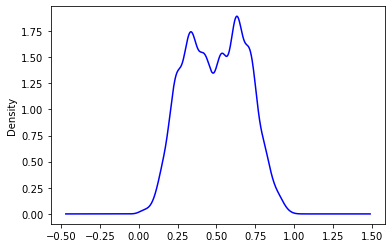

In [12]:
temp_density = inp1.temp.plot.density(color = "Blue")

#### We check the presence of outliers for the normalized temperatures variable.

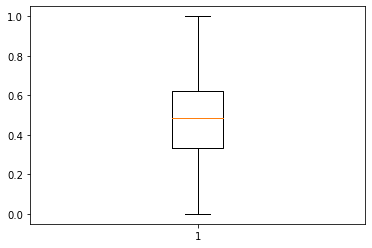

In [13]:
atemp_boxplot = plt.boxplot(inp1.atemp)

#### No outlier detected.

#### We check whether there is abnormal high value for the humidity variable.

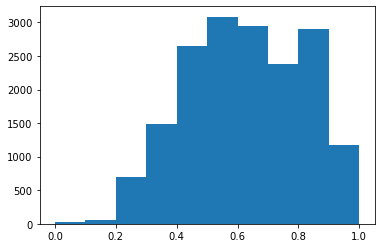

In [14]:
hum_hist = plt.hist(inp1.hum)

#### There seem to be no abnormal high value.

#### We use a dentisy plot for the windspeed variable.

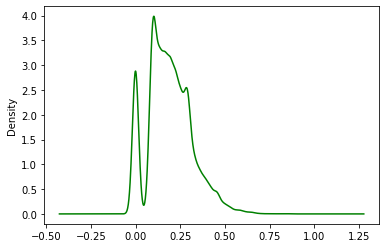

In [15]:
windspeed_density = inp1.windspeed.plot.density(color = "Green")

#### We check the distribution and the presence of outliers for our target variable (count of bike travel).

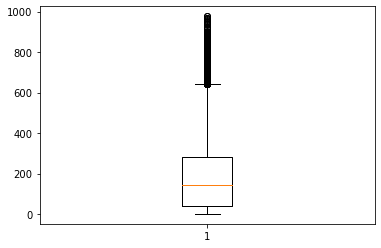

In [16]:
count_boxplot = plt.boxplot(inp1.cnt)

#### There are some abnormal high values.

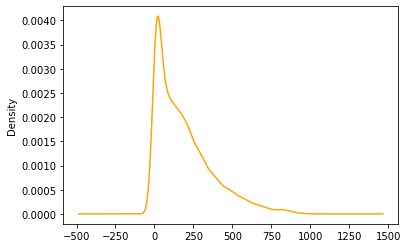

In [17]:
count_density = inp1.cnt.plot.density(color = "Orange")

#### We check percentiles for the count variable.

In [18]:
cnt_10th = np.percentile(inp1["cnt"], 10)
cnt_25th = np.percentile(inp1["cnt"], 25)
cnt_50th = np.percentile(inp1["cnt"], 50)
cnt_75th = np.percentile(inp1["cnt"], 75)
cnt_90th = np.percentile(inp1["cnt"], 90)
cnt_95th = np.percentile(inp1["cnt"], 95)
cnt_99th = np.percentile(inp1["cnt"], 99)

In [19]:
print("Count 10th percentile is {0}. \n25th percentile is {1}. \n50th percentile is {2}. \n75th percentile is {3}.\n90th percentile is {4}. \n95th percentile is {5}. \n99th percentile is {6}.".format(cnt_10th, cnt_25th, cnt_50th, cnt_75th, cnt_90th, cnt_95th, cnt_99th))

Count 10th percentile is 9.0. 
25th percentile is 40.0. 
50th percentile is 142.0. 
75th percentile is 281.0.
90th percentile is 451.2000000000007. 
95th percentile is 563.0999999999985. 
99th percentile is 782.2200000000012.


#### We decide a cutoff percentile (95th) to drop the abnormal high values.

In [20]:
inp2 = inp1[inp1.cnt < np.percentile(inp1.cnt,95)]

In [21]:
inp1.cnt.count()

17379

In [22]:
inp2.cnt.count()

16510

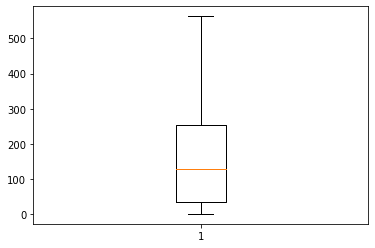

In [23]:
count_boxplot2 = plt.boxplot(inp2.cnt)

#### Bar plot to visualize the relationship between count and hour variables.

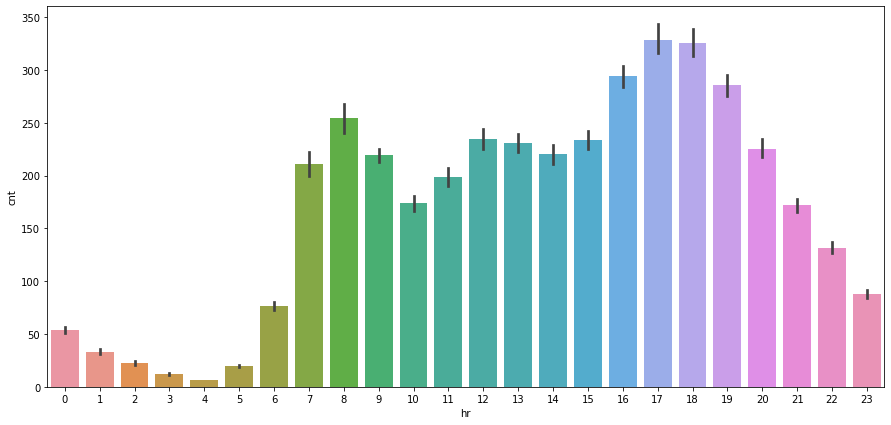

In [24]:
import seaborn as sb

plt.figure(figsize = [15,7])
count_vs_hour = sb.barplot(x = "hr", y = "cnt", data = inp2)

#### Box plot for count and weekday variables.

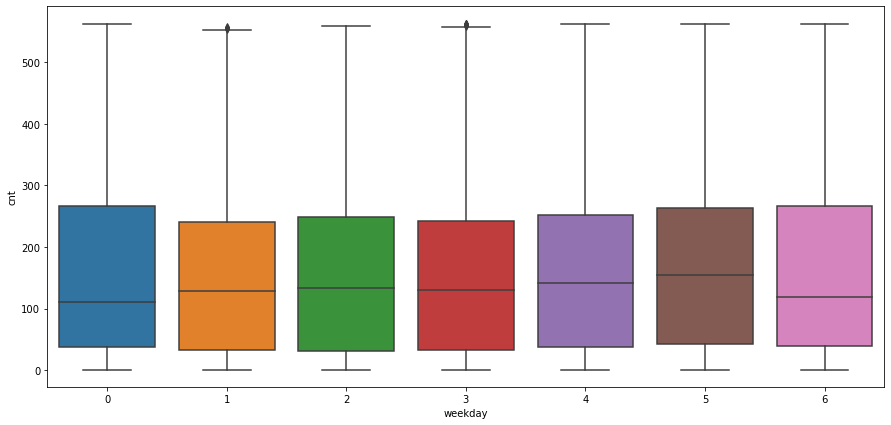

In [25]:
plt.figure(figsize = [15,7])
count_vs_weekday = sb.boxplot(x = "weekday", y = "cnt", data = inp2)

#### Box plot for count and month variables.

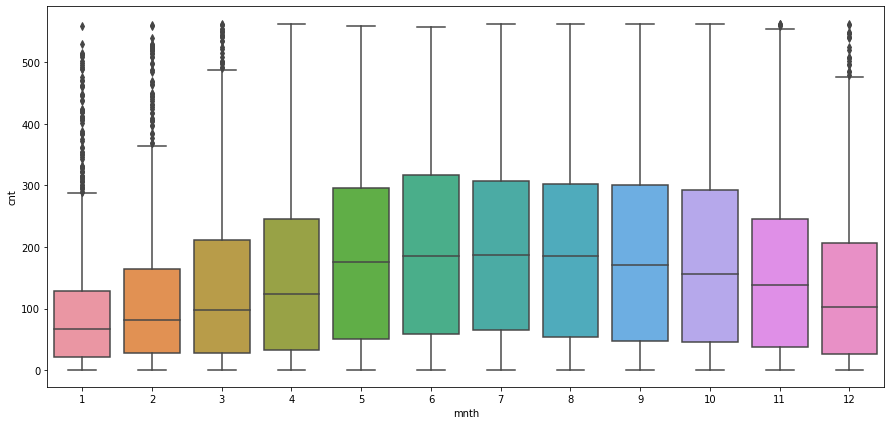

In [26]:
plt.figure(figsize = [15,7])
count_vs_month = sb.boxplot(x = "mnth", y = "cnt", data = inp2)

#### Box plot for count and season variables.

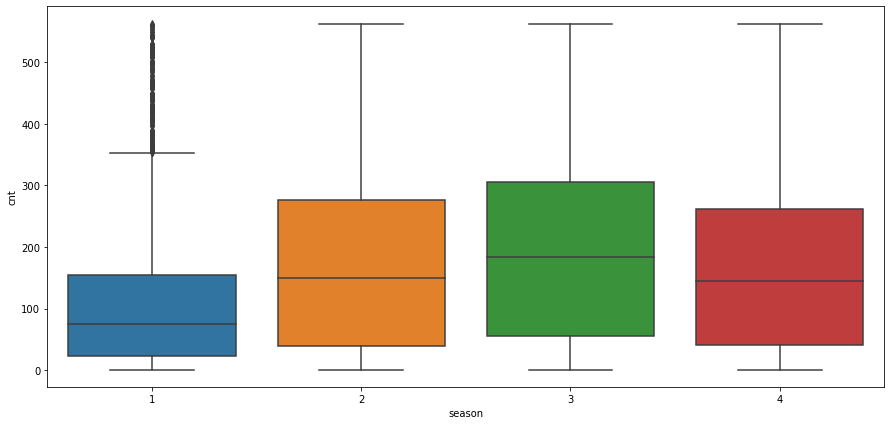

In [27]:
plt.figure(figsize = [15,7])
count_vs_season = sb.boxplot(x = "season", y = "cnt", data = inp2)

#### We analyze the correlation between temperatures, normalized temperatures, humidity and windspeed variables.

<AxesSubplot:>

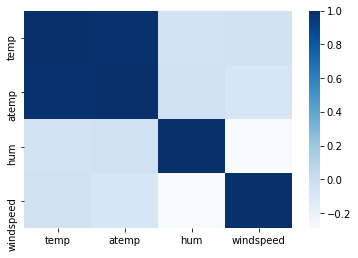

In [28]:
corr_matrice = inp2[["temp", "atemp", "hum", "windspeed"]].corr()
sb.heatmap(corr_matrice, cmap="Blues")

In [29]:
import warnings
warnings.filterwarnings("ignore")

#### We create groups of months and hours in order to avoid having to many categorical levels. We choose to group May to October as they have mostly similar values for count variable (grouped as "5"). 

In [30]:
inp3 = inp2.copy()
inp3.mnth[inp3.mnth.isin([5,6,7,8,9,10])] = 5
np.unique(inp3.mnth)

array([ 1,  2,  3,  4,  5, 11, 12], dtype=int64)

#### Similarly, 0 to 5 hours have low values for count variable (grouped as "0"). 11 to 15 hours are grouped as "11".

In [31]:
inp3.hr[inp3.hr.isin([0,1,2,3,4,5])] = 0
inp3.hr[inp3.hr.isin([11,12,13,14,15])] = 11
np.unique(inp3.hr)

array([ 0,  6,  7,  8,  9, 10, 11, 16, 17, 18, 19, 20, 21, 22, 23],
      dtype=int64)

#### We create dummy variables for season, weather situation, weekday and our newly grouped months and hours variables

In [32]:
inp3 = pd.get_dummies(inp3, columns=["season","weathersit","weekday","mnth","hr"], drop_first=True)
inp3.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_11', 'mnth_12', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22',
       'hr_23'],
      dtype='object')

#### We divide our dataset into train and test sets (70% - 30%).

In [33]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(inp3, train_size=0.7, random_state=42)

#### Then define X and Y for each train and test sets, X being our indepedent variables and Y our target variable (count).

In [34]:
y_train = df_train.pop("cnt")
X_train = df_train

y_test = df_test.pop("cnt")
X_test = df_test

#### Next, we build a model using linear regression.

In [35]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

#### R² on the train set.

In [36]:
from sklearn.metrics import r2_score
y_train_hat = linreg.predict(X_train)
r2_score(y_train, y_train_hat)

0.6633938521473202

#### R² on the test set.

In [37]:
y_test_hat = linreg.predict(X_test)
r2_score(y_test, y_test_hat)

0.6688916221858168

#### The model seems to perfom well on both train and test sets.